In [1]:
#step1
import numpy as np
import statsmodels.api as sm #step6
from statsmodels.tsa.api import VAR #step7
from sklearn.linear_model import LinearRegression #step15
from sklearn.preprocessing import PolynomialFeatures #step 16
from datetime import datetime as dt #step 17
from sklearn.model_selection import train_test_split #step17
import statsmodels.api as sm #step 19
from statsmodels.tsa.api import VAR #step 19

import datetime #step6
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.patches as mpatches #step5



In [2]:
#step2
sea_level_data2015 = pd.read_csv('./sea_levels_2015.csv')   #read first dataset
seaLevelData2021 = pd.read_csv('./seaLevel2021.csv')        #read first dataset
print("1880-2015 datas: ",sea_level_data2015.shape)
print(sea_level_data2015.head())
print(sea_level_data2015.info()) 

print("\n 1993-2021 datas: ",seaLevelData2021.shape)
print(seaLevelData2021.head())
print(seaLevelData2021.info())

#show first 5 record to comparing datasets
#informaitons of the datasets


1880-2015 datas:  (1608, 3)
         Time   GMSL  GMSL uncertainty
0  1880-01-15 -183.0              24.2
1  1880-02-15 -171.1              24.2
2  1880-03-15 -164.3              24.2
3  1880-04-15 -158.2              24.2
4  1880-05-15 -158.7              24.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB
None

 1993-2021 datas:  (1048, 9)
   Year  TotalWeightedObservations  GMSL_noGIA  StdDevGMSL_noGIA  \
0  1993                  327401.31      -38.59             89.86   
1  1993                  324498.41      -41.97             90.86   
2  1993                  333018.19      -41.93             87.27   
3  1993                  297483.19   

In [3]:
#step3
# Checking count of missing values
print(sea_level_data2015.isnull().sum()) 

print(seaLevelData2021.isnull().sum()) 
# There is not any null value in the dataset

Time                0
GMSL                0
GMSL uncertainty    0
dtype: int64
Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64


113.46557779340162


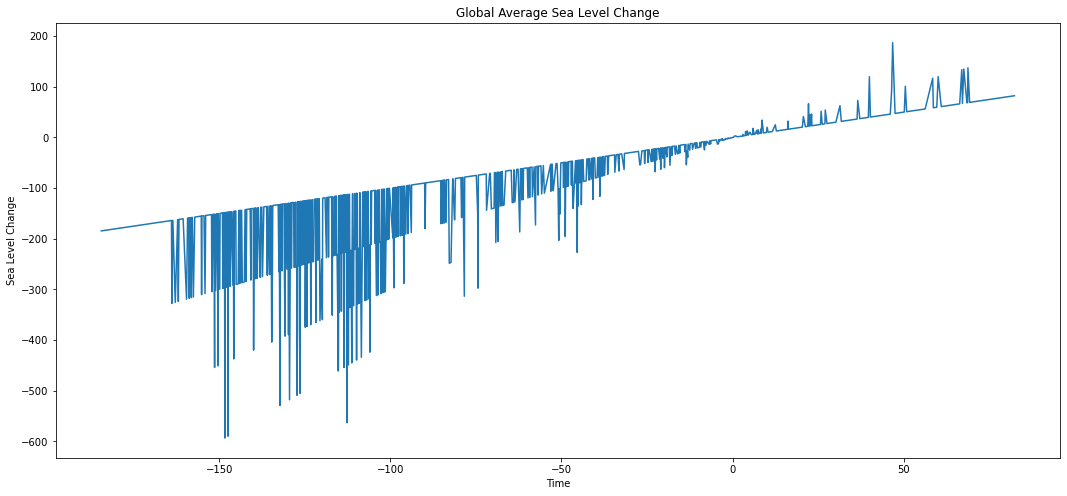

In [4]:
#step4
t_series=sea_level_data2015.groupby(["GMSL"])["GMSL"].sum()
t_series.astype('float') 
print(t_series.std()) # GMSL column standard deviation
plt.figure(figsize=(18,8))
plt.title('Global Average Sea Level Change')
plt.xlabel('Time')
plt.ylabel('Sea Level Change')
plt.plot(t_series) 


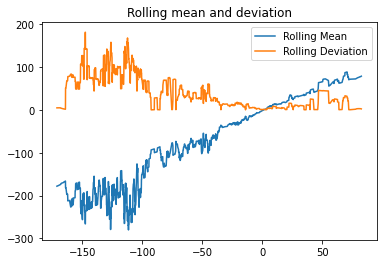

In [5]:

#step5
plt.plot(t_series.rolling(window=10).mean(),label='Rolling Mean')     # window sensetive (increase value to more sensetive)
plt.plot(t_series.rolling(window=10).std(),label='Rolling Deviation') # window sensetive (increase value to more sensetive)
plt.legend()
plt.title('Rolling mean and deviation')
plt.show()


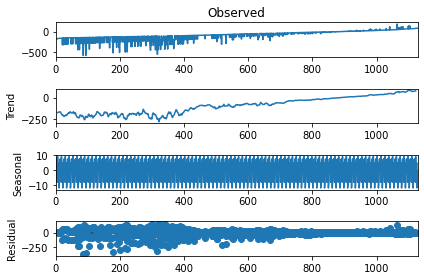

In [6]:
#step6
sea_level_data2015.Time=sea_level_data2015.Time.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d')) # Time datas are converted to date type 
result_tsa = sm.tsa.seasonal_decompose(t_series.values, period=12,model="additive") # statical of values according to period
fig = result_tsa.plot()

# trend — the general direction of the series over a long period of time
# seasonality — timing of regular record
# residual — the irregular component consisting of the fluctuations in the time series after removing the previous components

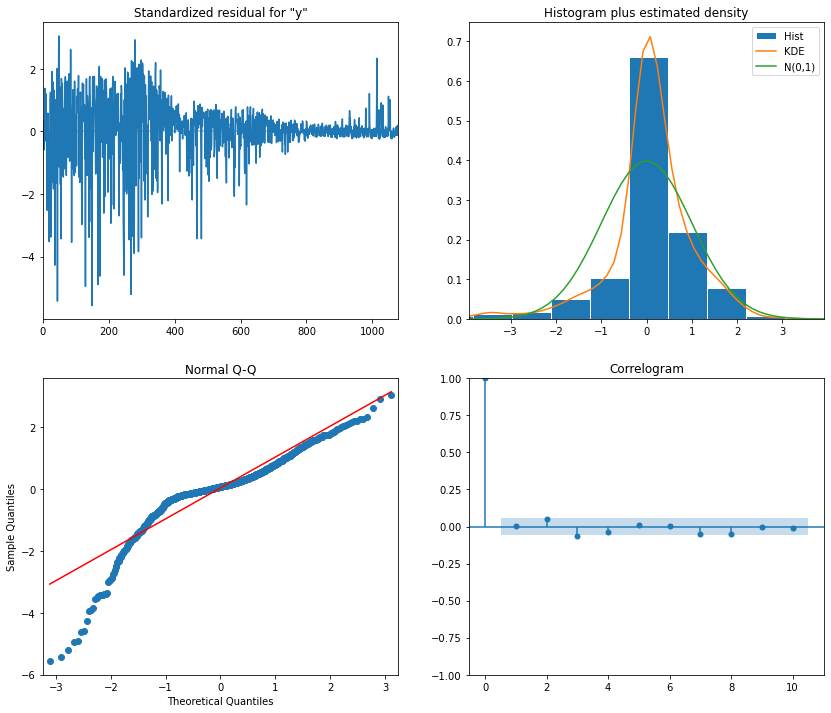

In [7]:
#step7
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(t_series.values,
                                order = (1, 1, 1),
                                seasonal_order = (3, 1, 2, 12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(14,12))
plt.show()

30.851790295016485


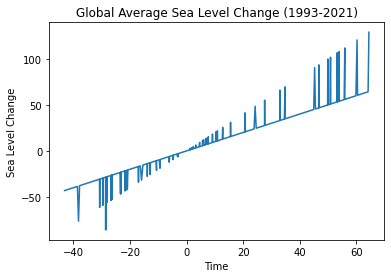

In [8]:
#step8

t_series=seaLevelData2021.groupby(["GMSL_GIA"])["GMSL_GIA"].sum()
t_series.astype('float')
print(t_series.std())   # GMSL column standard deviation
plt.title('Global Average Sea Level Change (1993-2021)')
plt.xlabel('Time')
plt.ylabel('Sea Level Change')
plt.plot(t_series)

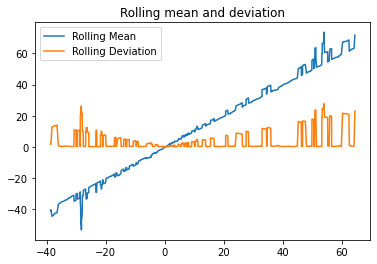

In [9]:
#step9 
plt.plot(t_series.rolling(window=8).mean(),label='Rolling Mean')     # window sensetive (increase value to more sensetive)
plt.plot(t_series.rolling(window=8).std(),label='Rolling Deviation') # window sensetive (increase value to more sensetive)
plt.legend()
plt.title('Rolling mean and deviation')
plt.show()

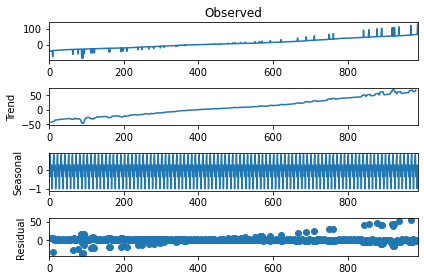

In [10]:
#step10
seaLevelData2021.Year=seaLevelData2021.Year.apply(lambda x:datetime.datetime.strptime(str(x), '%Y')) # Time datas are converted to date type 
result_tsa = sm.tsa.seasonal_decompose(t_series.values, period=10,model="additive") # statical of values according to period
fig = result_tsa.plot()


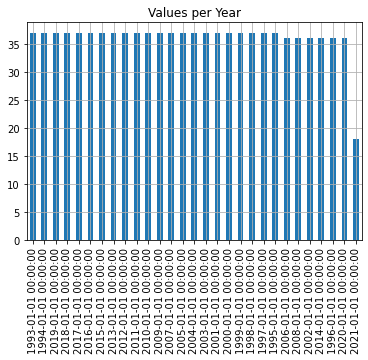

In [11]:
#step11
# distribution of years
seaLevelData2021.Year.value_counts().plot(kind='bar')

plt.title('Values per Year')
plt.grid()
plt.show()

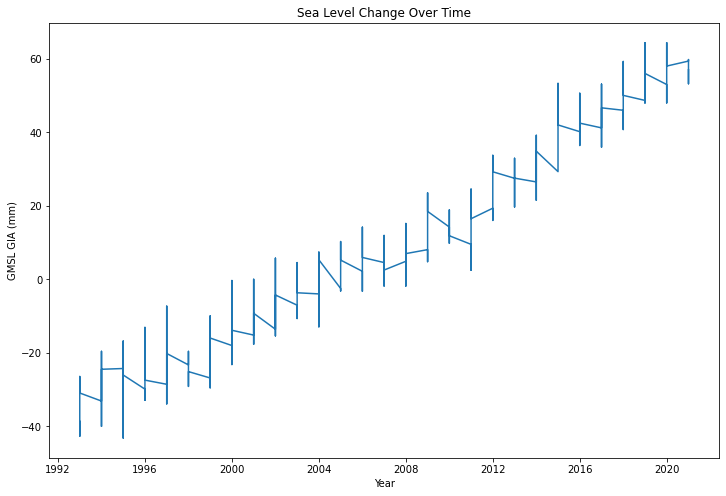

In [12]:
#step12
# Create the plot
plt.figure(figsize=(12, 8))
g=plt.plot(seaLevelData2021.Year, seaLevelData2021.GMSL_GIA)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('GMSL GIA (mm)')
plt.title('Sea Level Change Over Time')

# display the plot
display(g)

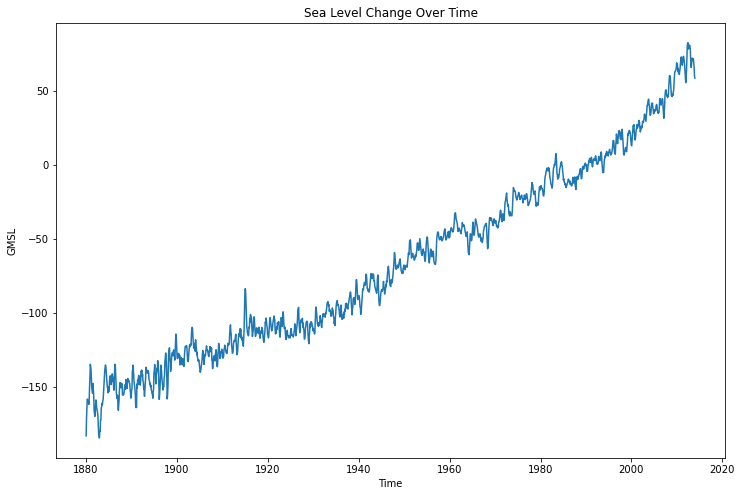

In [13]:
#step13
# Create the plot
plt.figure(figsize=(12, 8))
g=plt.plot(sea_level_data2015.Time, sea_level_data2015.GMSL)

# Add labels and a title
plt.xlabel('Time')
plt.ylabel('GMSL')
plt.title('Sea Level Change Over Time')

# display the plot
display(g)

Text(0.5, 1.0, 'Sea Level Change Over Time')

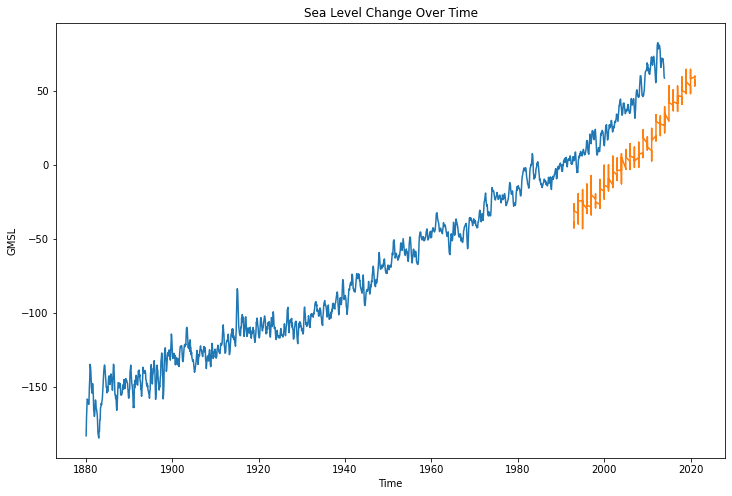

In [14]:
#step14

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(sea_level_data2015.Time, sea_level_data2015.GMSL)
plt.plot(seaLevelData2021.Year,seaLevelData2021.GMSL_GIA)
# Add labels and a title
plt.xlabel('Time')
plt.ylabel('GMSL')
plt.title('Sea Level Change Over Time')

# display the plot



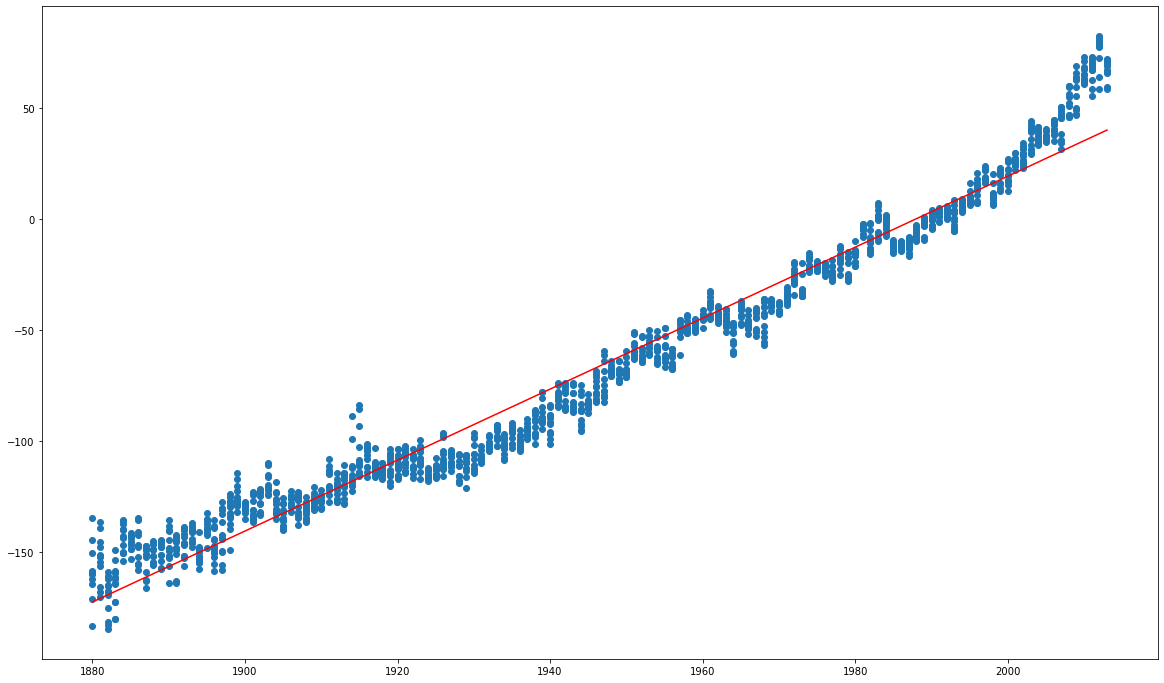

In [15]:
# #step15
x=sea_level_data2015["Time"]
y=sea_level_data2015["GMSL"]

years=np.array([])

for i in x.values:
    years=np.append(years,[int(str(i).split('-')[0])]) # years will be just year like 1880 
    
#print(years)
x=years.reshape(-1,1)
y=y.values.reshape(-1,1)
regressor=LinearRegression() 
regressor.fit(x,y) # linear regression
regressor.predict(x)
plt.figure(figsize=(20, 12))
plt.scatter(x,y)
plt.plot(x, regressor.predict(x), color="red")


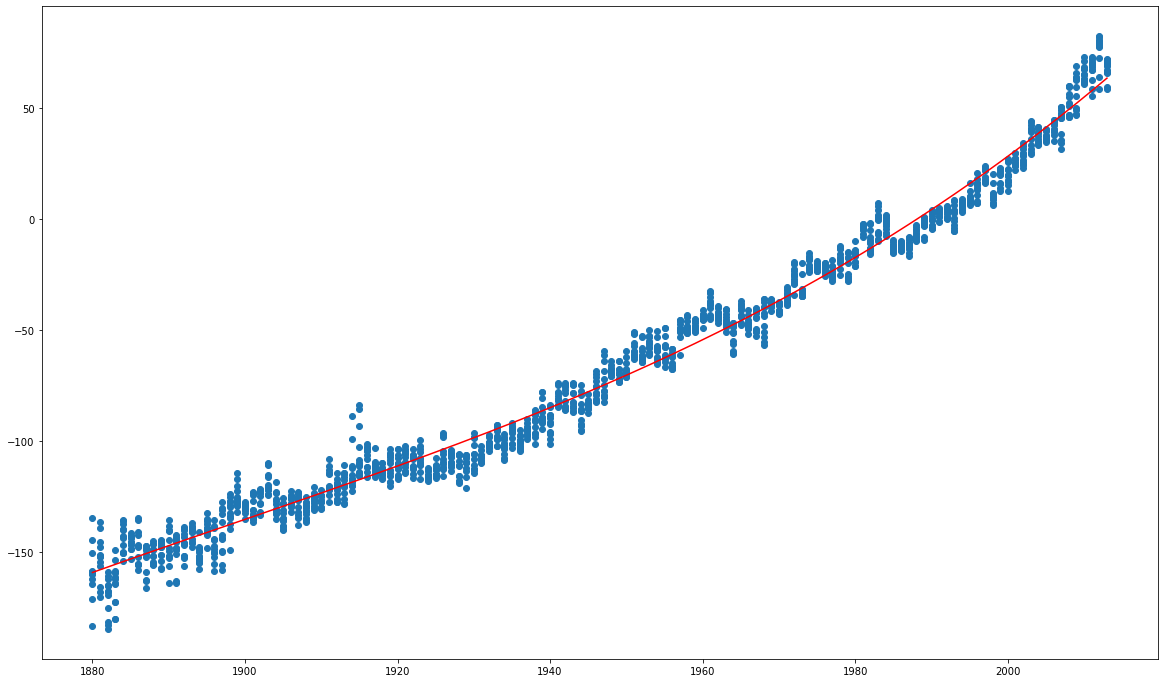

In [16]:
#step16
pol=PolynomialFeatures(degree=3) 
newx=pol.fit_transform(x)
pol_regressor=LinearRegression()
pol_regressor.fit(newx,y) 
pol_regressor.predict(newx) # polynomal regression
plt.figure(figsize=(20, 12))
plt.scatter(x,y)
plt.plot(x,pol_regressor.predict(newx),color="red")




In [17]:
#step17
#print(sea_level_data2015['Time'])
def convert_date_to_ordinal(date):
    #print(date)
    return dt.strptime(date, '%Y-%m-%d %X').toordinal()

sea_level_data2015['dt_ordinal'] = sea_level_data2015['Time'].apply(lambda x: convert_date_to_ordinal(str(x)))
sea_level_data2015.head()

X= sea_level_data2015.dt_ordinal.to_numpy().reshape(-1,1) # linear dates
Y= sea_level_data2015.GMSL      #values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25) # split dataset as train and test %75
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

print('Regressor variance Score', regressor.score(x_test,y_test))
print('Coefficients: ', regressor.coef_)



Regressor variance Score 0.9689711266015264
Coefficients:  [0.00437695]


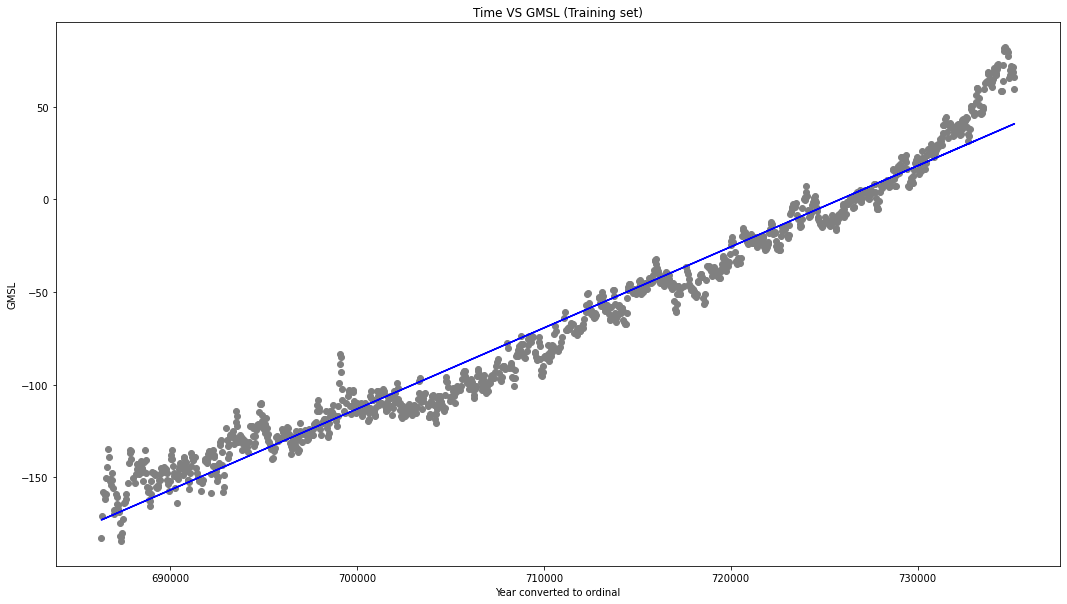

In [18]:
#step18
plt.figure(figsize=(18, 10))
plt.scatter(x_train, y_train, color='grey')     #predict accoring to train 
plt.plot(x_train, regressor.predict(x_train), color='blue') 
plt.title('Time VS GMSL (Training set)')
plt.xlabel('Year converted to ordinal')
plt.ylabel('GMSL')
plt.show()

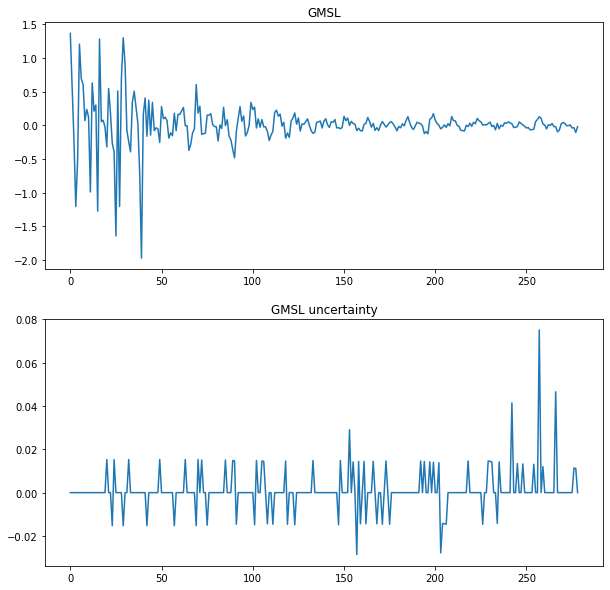

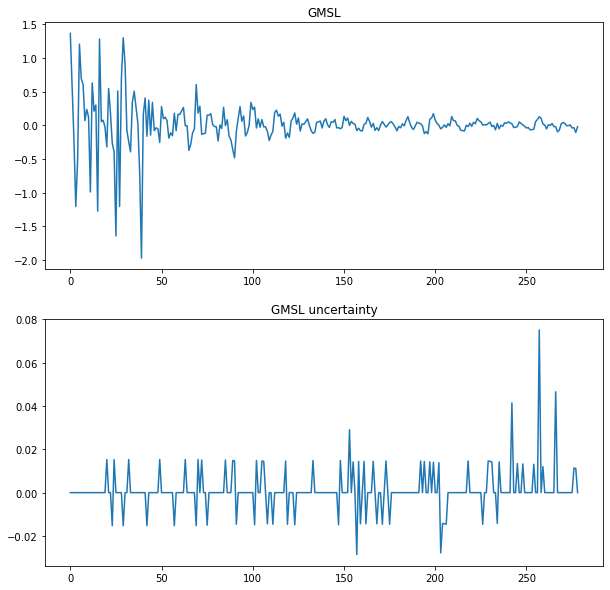

In [19]:
#step19
from statsmodels.tsa.base.datetools import dates_from_str
# def fun(month):
#     if (int(month)<=3):
#         return 1
#     elif (3<int(month)<=6):
#         return 2
#     elif (6<int(month)<=9):
#         return 3
#     elif (9<int(month)<=12):
#         return 4
        
# #print(sea_level_data2015['Time'].map(lambda x: str(x).split('-')[1]))

# q=sea_level_data2015['Time'].map(lambda x: str(x).split('-')[0])+'Q'+ fun("5")
# print(q)
sea_data=sea_level_data2015[['GMSL', 'GMSL uncertainty']]
sea_data.index = pd.DatetimeIndex(sea_level_data2015['Time'])

data = np.log(sea_data).diff().dropna()
model = VAR(data)

results = model.fit(2)
results.plot()